In [1]:
install.packages("igraph")


  There is a binary version available but the source version is later:
       binary source needs_compilation
igraph  1.2.6  1.4.2              TRUE

  Binaries will be installed
package 'igraph' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'igraph'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\yaman\anaconda3\Lib\R\library\00LOCK\igraph\libs\x64\igraph.dll to C:\Users\yaman\anaconda3\Lib\R\library\igraph\libs\x64\igraph.dll: Permission denied"Warning message:
"restored 'igraph'"


The downloaded binary packages are in
	C:\Users\yaman\AppData\Local\Temp\RtmpUBrm7B\downloaded_packages


In [2]:
library('igraph')

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



# Part 1.2a

[1] "Partial Attachment Model produced a connected graph"


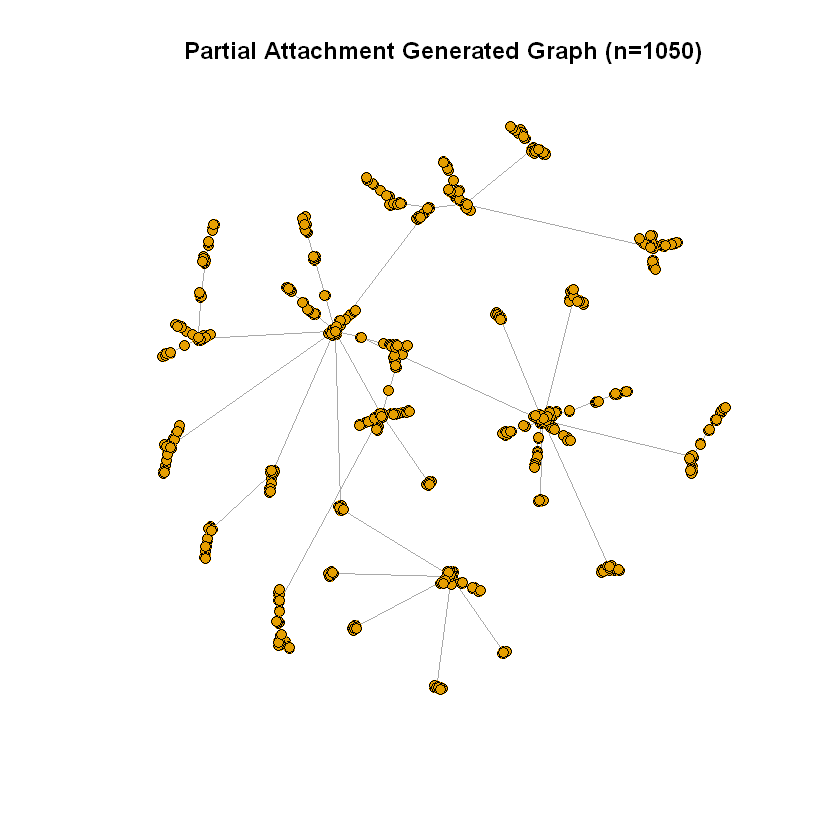

In [3]:
#Part 1.2a
pa_part_a = sample_pa(n = 1050,m = 1,directed = FALSE)
if(is_connected(pa_part_a)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_a,vertex.size=4, vertex.label=NA, main="Partial Attachment Generated Graph (n=1050)")

# Part 1.2b

[1] "Modularity of PA graph:  0.929201718282697"


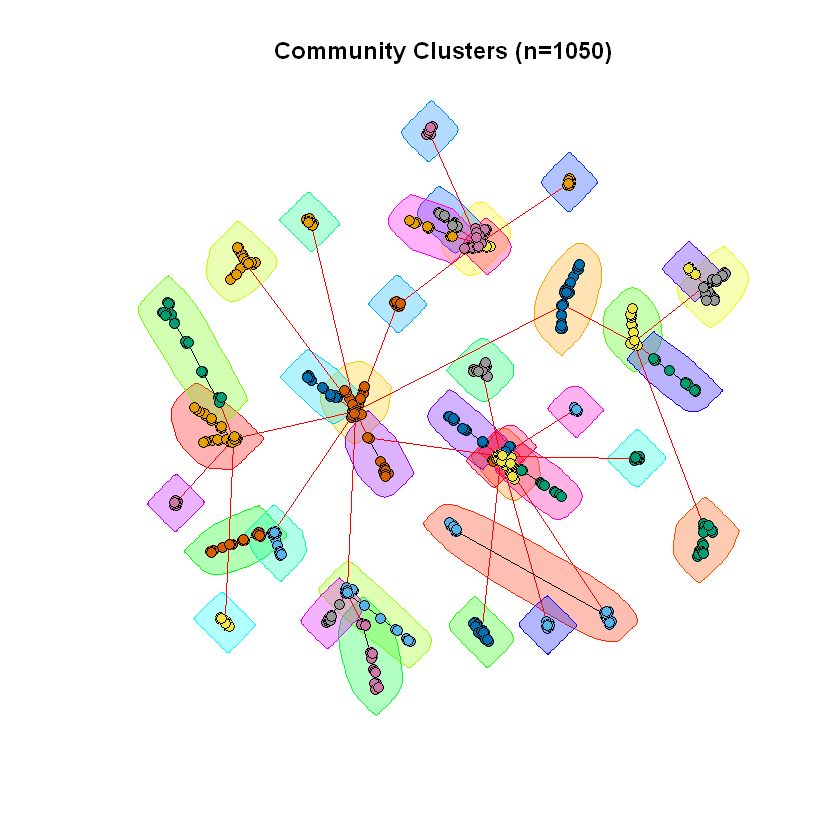

In [4]:
#Part 1.2b
pa_community = cluster_fast_greedy(pa_part_a)
pa_modularity = modularity(pa_community)
plot(pa_community,pa_part_a, vertex.size = 4,vertex.label = NA, main="Community Clusters (n=1050)")
print(paste("Modularity of PA graph: ", pa_modularity))

# Part 1.2c

In [5]:
#Part 1.c

pa_part_c = sample_pa(n = 10500,m = 1,directed = FALSE)
if(is_connected(pa_part_c)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}

[1] "Partial Attachment Model produced a connected graph"


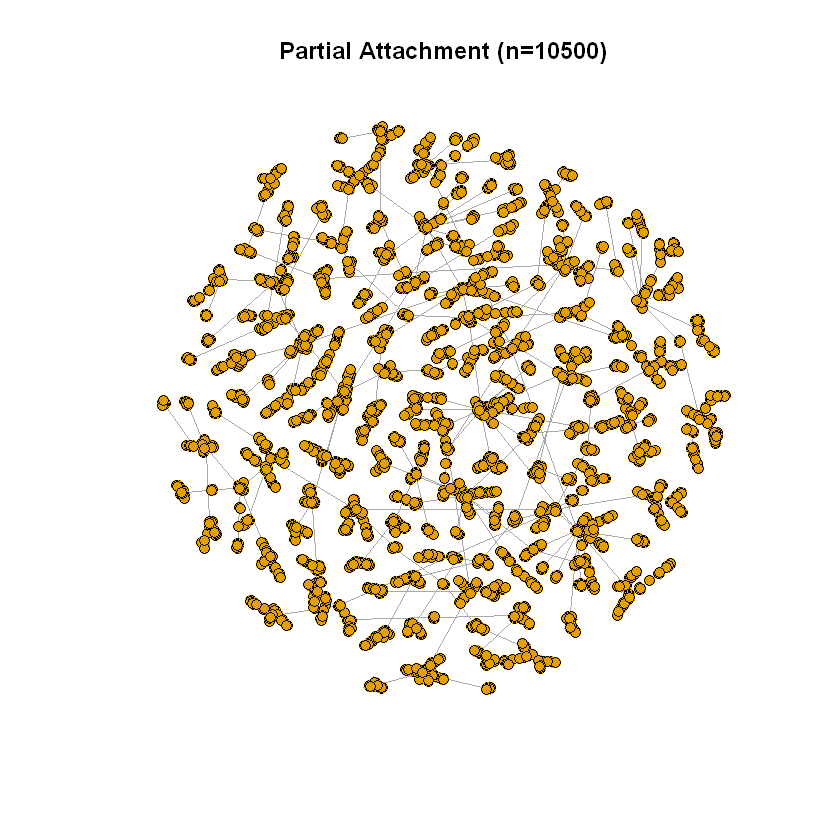

[1] "Modularity of PA graph:  0.978738186151221"
[1] "Assortativity of PA graph:  -0.0425268708026325"


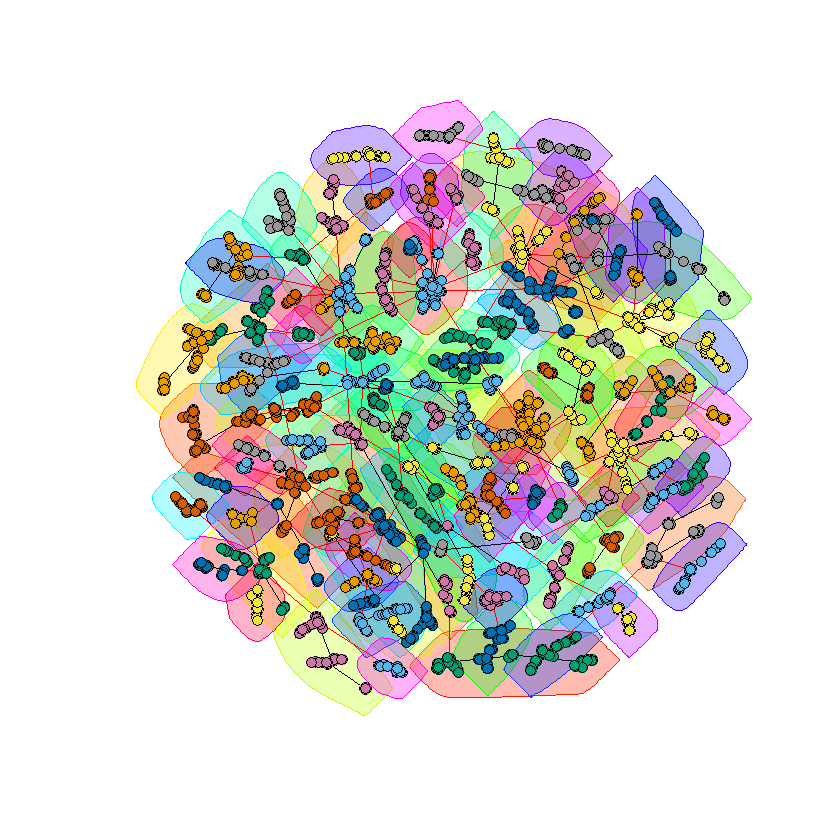

In [6]:
plot(pa_part_c,vertex.size=4, vertex.label=NA, main="Partial Attachment (n=10500)")
pa_community_c = cluster_fast_greedy(pa_part_c)
pa_modularity_c = modularity(pa_community_c)
pa_assortativity_c = assortativity_degree(pa_part_c)
plot(pa_community_c,pa_part_c, vertex.size = 4,vertex.label = NA)
print(paste("Modularity of PA graph: ", pa_modularity_c))
print(paste("Assortativity of PA graph: ", pa_assortativity_c))

[1] "Slope and intercept for n = 1050:"

Call:
lm(formula = log_dist_1 ~ log_deg_1)

Coefficients:
(Intercept)    log_deg_1  
     0.4332      -2.3782  



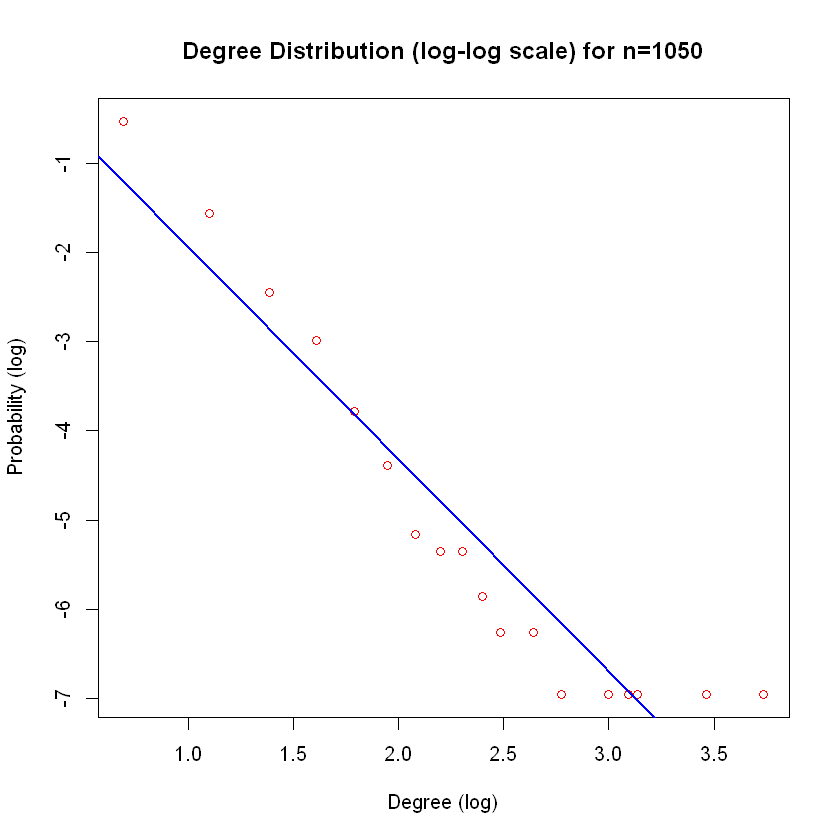

In [7]:
degree_dist_1 = degree.distribution(pa_part_a)
log_deg_1 <- log(which(degree_dist_1 !=0, arr.ind = TRUE))
log_dist_1 <- log(degree_dist_1[which(degree_dist_1 !=0)])
plot(log_deg_1,log_dist_1,main="Degree Distribution (log-log scale) for n=1050", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_1 = lm(log_dist_1 ~ log_deg_1)
abline(fit_1,col="blue",lwd=2)  
print("Slope and intercept for n = 1050:")
print(fit_1)

[1] "Fitting data for n = 10500:"

Call:
lm(formula = log_dist_2 ~ log_deg_2)

Coefficients:
(Intercept)    log_deg_2  
      1.204       -2.918  



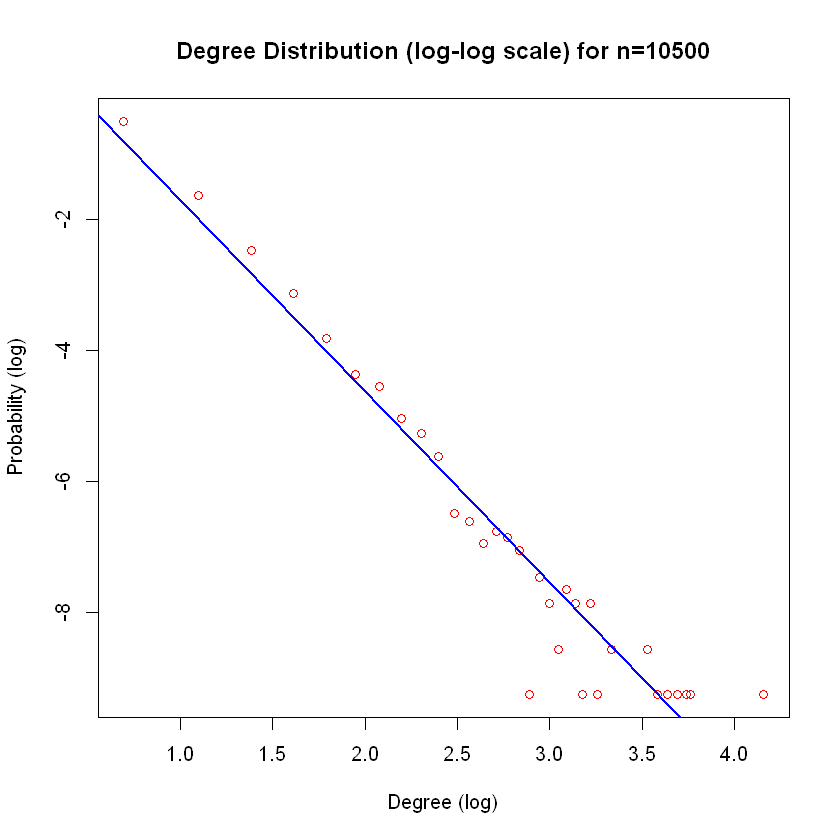

In [8]:
degree_dist_2 = degree.distribution(pa_part_c)
log_deg_2 <- log(which(degree_dist_2 !=0))
log_dist_2 <- log(degree_dist_2[which(degree_dist_2 !=0)])
plot(log_deg_2,log_dist_2,main="Degree Distribution (log-log scale) for n=10500", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_2 = lm(log_dist_2 ~ log_deg_2)
abline(fit_2,col="blue",lwd=2)
print("Fitting data for n = 10500:")
print(fit_2)

In [9]:
degree_neighbors_a = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_a), 1) 
    neighbors_i = neighbors(pa_part_a, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_a = c(degree_neighbors_a, degree(pa_part_a, node_j))
}

In [10]:
degree_neighbors_c = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_c), 1) 
    neighbors_i = neighbors(pa_part_c, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_c = c(degree_neighbors_c, degree(pa_part_c, node_j))
}

[1] "Fitting data for n = 1050:"

Call:
lm(formula = log_dist_neighbors_a ~ log_degree_neighbors_a)

Coefficients:
           (Intercept)  log_degree_neighbors_a  
                -1.536                  -0.914  



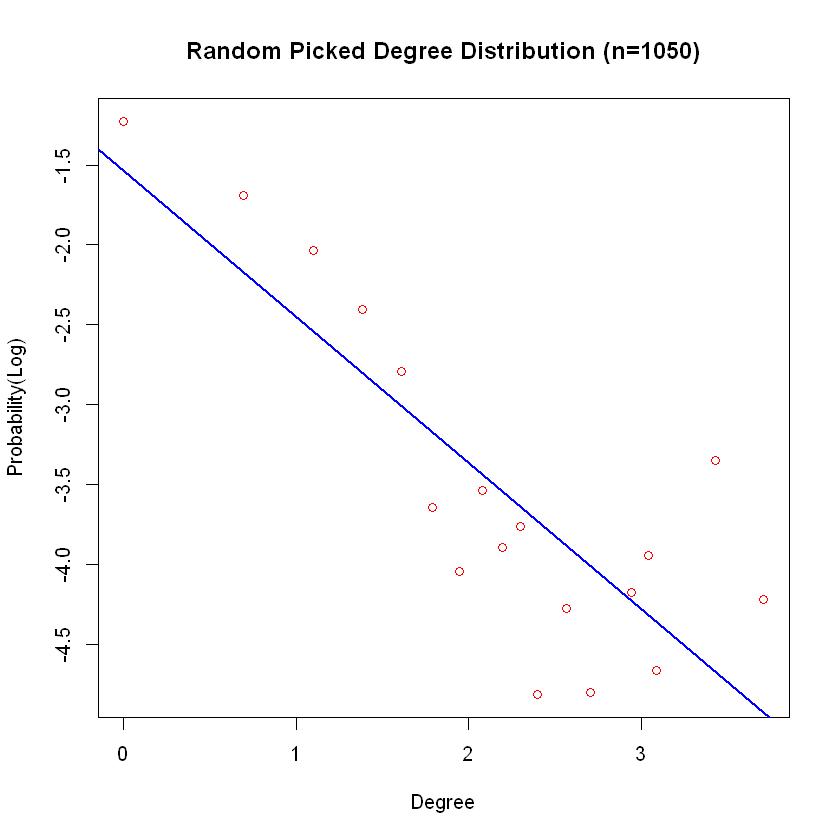

In [11]:
data_degree_neighbors_a = as.data.frame(table(degree_neighbors_a))
degrees = as.numeric(as.character(data_degree_neighbors_a$degree_neighbors_a))
log_degree_neighbors_a = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_a$Freq/sum(data_degree_neighbors_a$Freq)
log_dist_neighbors_a = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_a,log_dist_neighbors_a,main="Random Picked Degree Distribution (n=1050)", xlab= "Degree",ylab= "Probability(Log)",col="red")
fit_3 = lm(log_dist_neighbors_a ~ log_degree_neighbors_a)
abline(fit_3,col="blue",lwd=2)
print("Fitting data for n = 1050:")
print(fit_3)

[1] "Fitting data for n = 10500:"

Call:
lm(formula = log_dist_neighbors_c ~ log_degree_neighbors_c)

Coefficients:
           (Intercept)  log_degree_neighbors_c  
               -0.9356                 -1.4110  



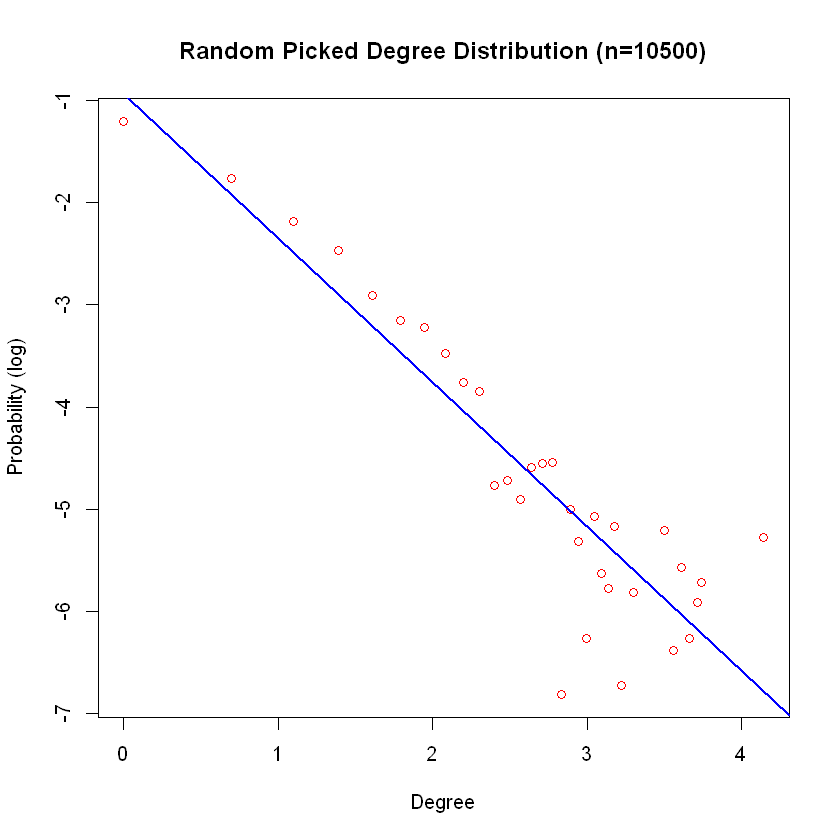

In [12]:
data_degree_neighbors_c = as.data.frame(table(degree_neighbors_c))
degrees = as.numeric(as.character(data_degree_neighbors_c$degree_neighbors_c))
log_degree_neighbors_c = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_c$Freq/sum(data_degree_neighbors_c$Freq)
log_dist_neighbors_c = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_c,log_dist_neighbors_c,main="Random Picked Degree Distribution (n=10500)", xlab="Degree",ylab="Probability (log)",col="red")
fit_4 = lm(log_dist_neighbors_c ~ log_degree_neighbors_c)
abline(fit_4,col="blue",lwd=2)
print("Fitting data for n = 10500:")
print(fit_4)

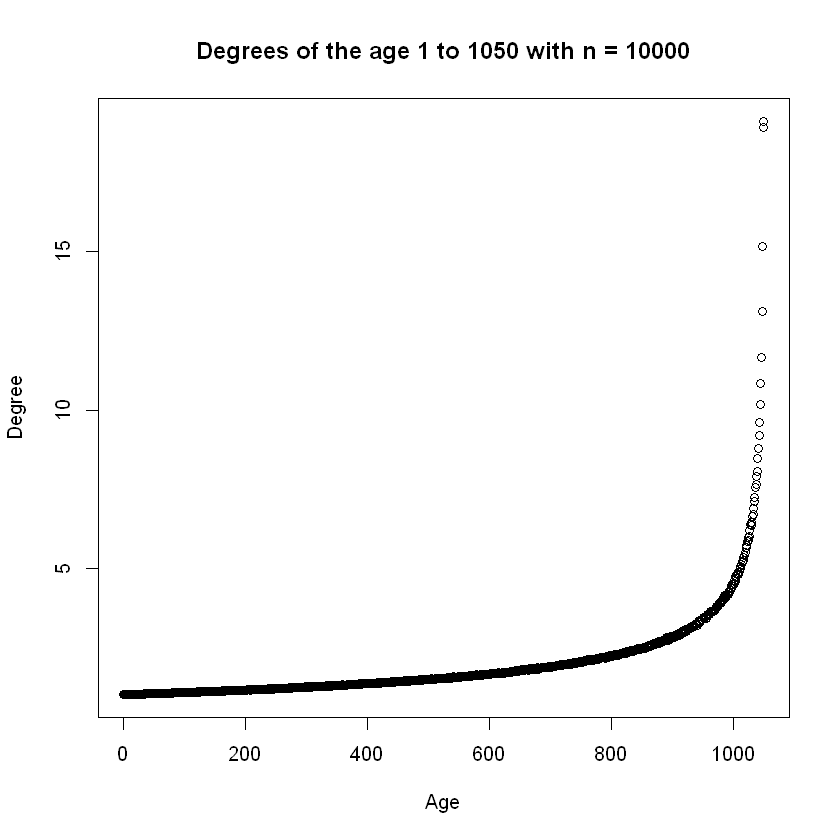

In [13]:
degree_age = rep(0,1050)
n_samples = 10000
for (i in seq(1:n_samples)) 
{
    graph_age = sample_pa(1050, m =1, directed=FALSE)
    degree_age = degree_age + as.vector(degree(graph_age))
}

degree_age = degree_age / n_samples
plot(seq(1050,1,-1), degree_age, main="Degrees of the age 1 to 1050 with n = 10000",xlab="Age",ylab="Degree")
     


In [14]:
#Part g

[1] "Partial Attachment Model produced a connected graph"


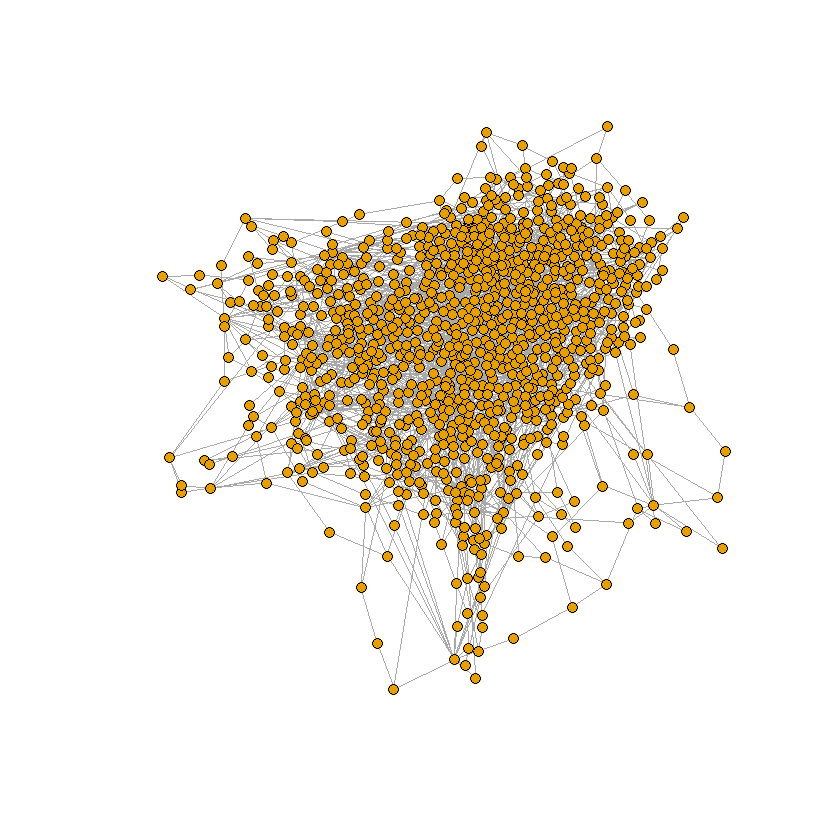

[1] "Modularity of PA graph:  0.530403471680711"
[1] "Assortativity: -0.0518797614935015"


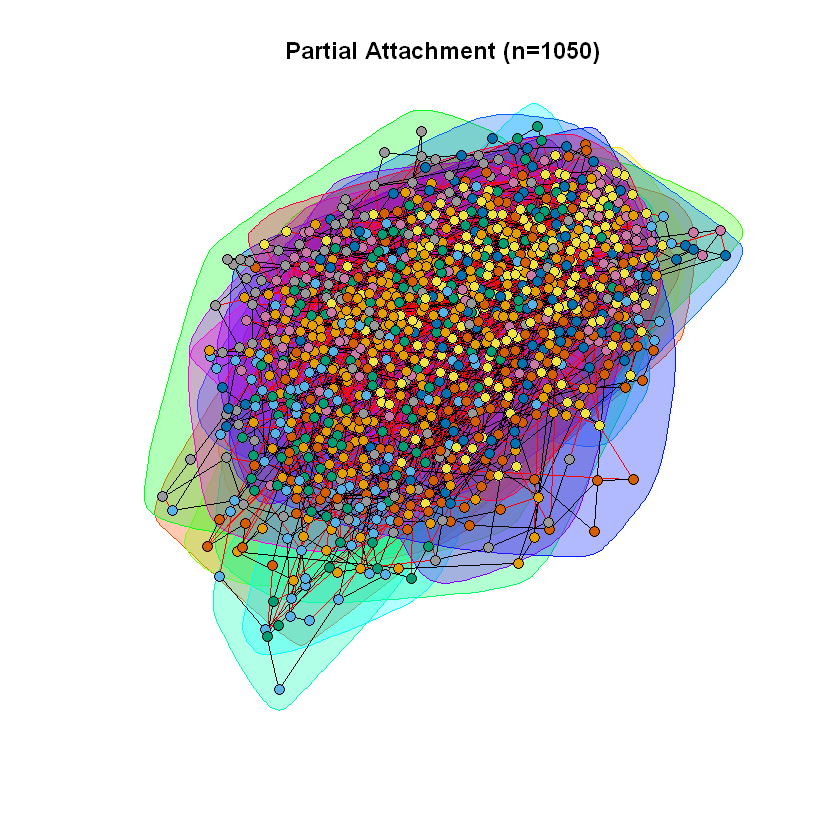

In [15]:
pa_part_f_1 = sample_pa(n = 1050,m = 2,directed = FALSE)
if(is_connected(pa_part_f_1)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_f_1,vertex.size=4, vertex.label=NA)
pa_community_1 = cluster_fast_greedy(pa_part_f_1)
pa_modularity_1 = modularity(pa_community_1)
pa_assortativity_1 = assortativity_degree(pa_part_f_1)
plot(pa_community_1,pa_part_f_1, vertex.size = 4,vertex.label = NA, main="Partial Attachment (n=1050)")
print(paste("Modularity of PA graph: ", pa_modularity_1))
print(paste("Assortativity:", pa_assortativity_1))

[1] "Partial Attachment Model produced a connected graph"


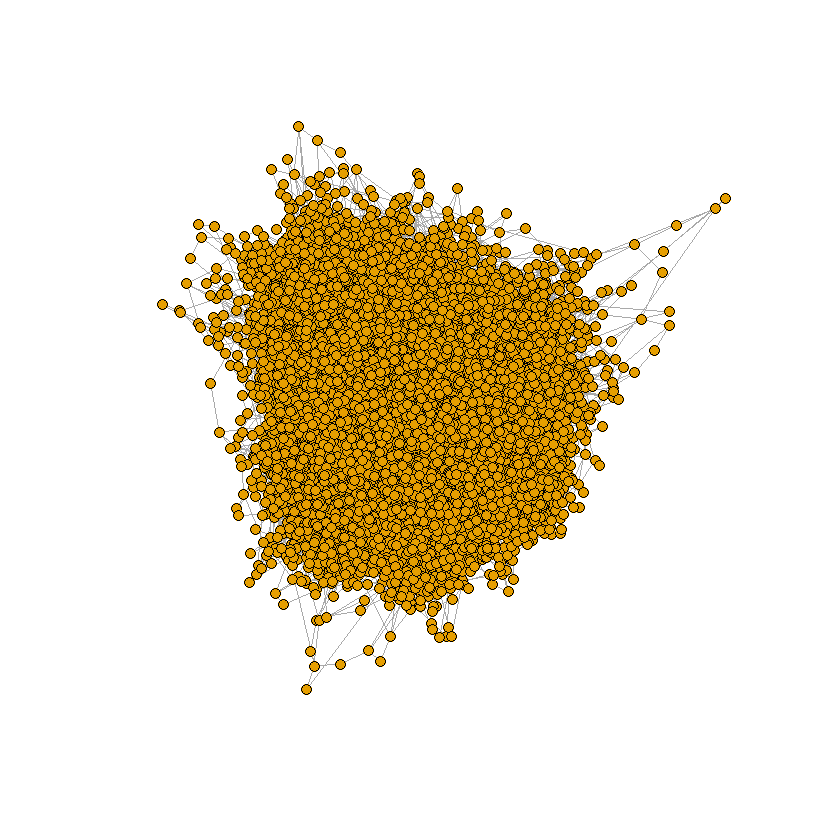

[1] "Modularity of PA graph:  0.531668059842471"
[1] "Assortativity: -0.0123169242893671"


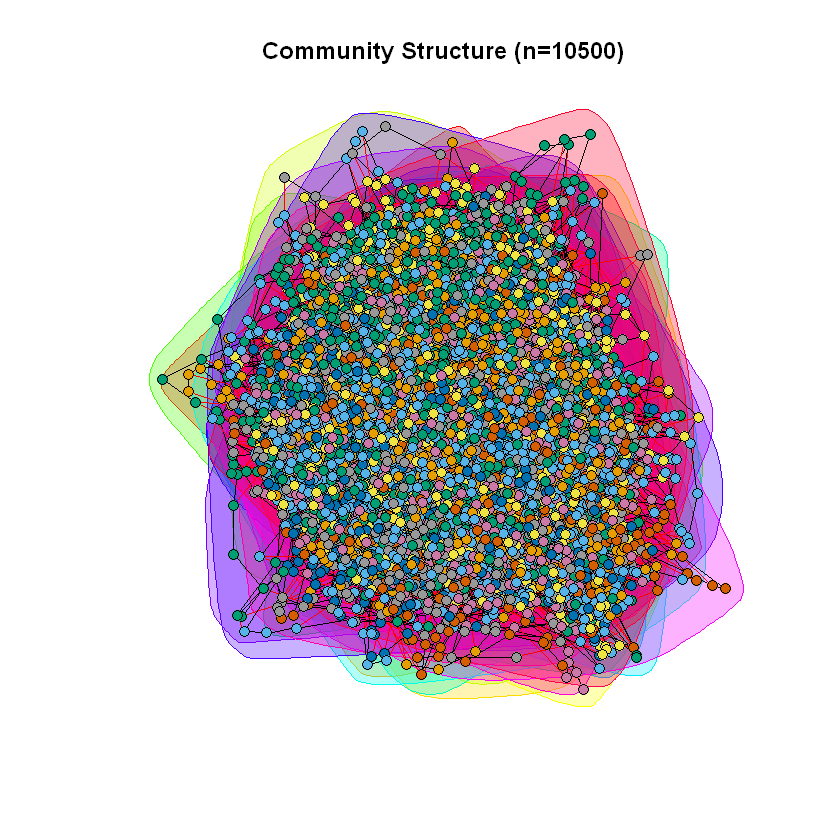

In [16]:
pa_part_f_2 = sample_pa(10500,m = 2,directed = FALSE)
if(is_connected(pa_part_f_2)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_f_2,vertex.size=4, vertex.label=NA)
pa_community_2 = cluster_fast_greedy(pa_part_f_2)
pa_modularity_2 = modularity(pa_community_2)
pa_assortativity_2 = assortativity_degree(pa_part_f_2)
plot(pa_community_2,pa_part_f_2, vertex.size = 4,vertex.label = NA, main="Community Structure (n=10500)")
print(paste("Modularity of PA graph: ", pa_modularity_2))
print(paste("Assortativity:", pa_assortativity_2))

[1] "Slope and intercept for n = 1050:"

Call:
lm(formula = log_dist_1 ~ log_deg_1)

Coefficients:
(Intercept)    log_deg_1  
     0.7764      -2.2007  



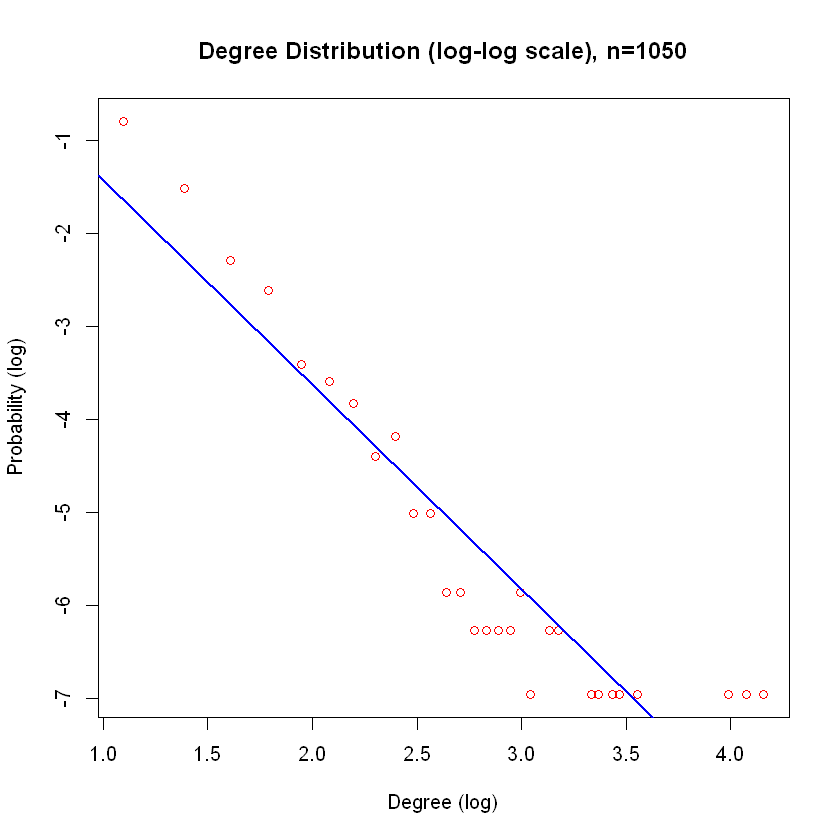

In [17]:
degree_dist_1 = degree.distribution(pa_part_f_1)
log_deg_1 <- log(which(degree_dist_1 !=0))
log_dist_1 <- log(degree_dist_1[which(degree_dist_1 !=0)])
plot(log_deg_1,log_dist_1,main="Degree Distribution (log-log scale), n=1050", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_1 = lm(log_dist_1 ~ log_deg_1)
abline(fit_1,col="blue",lwd=2)  
print("Slope and intercept for n = 1050:")
print(fit_1)

[1] "Fitting data for n = 10500:"

Call:
lm(formula = log_dist_2 ~ log_deg_2)

Coefficients:
(Intercept)    log_deg_2  
      1.018       -2.429  



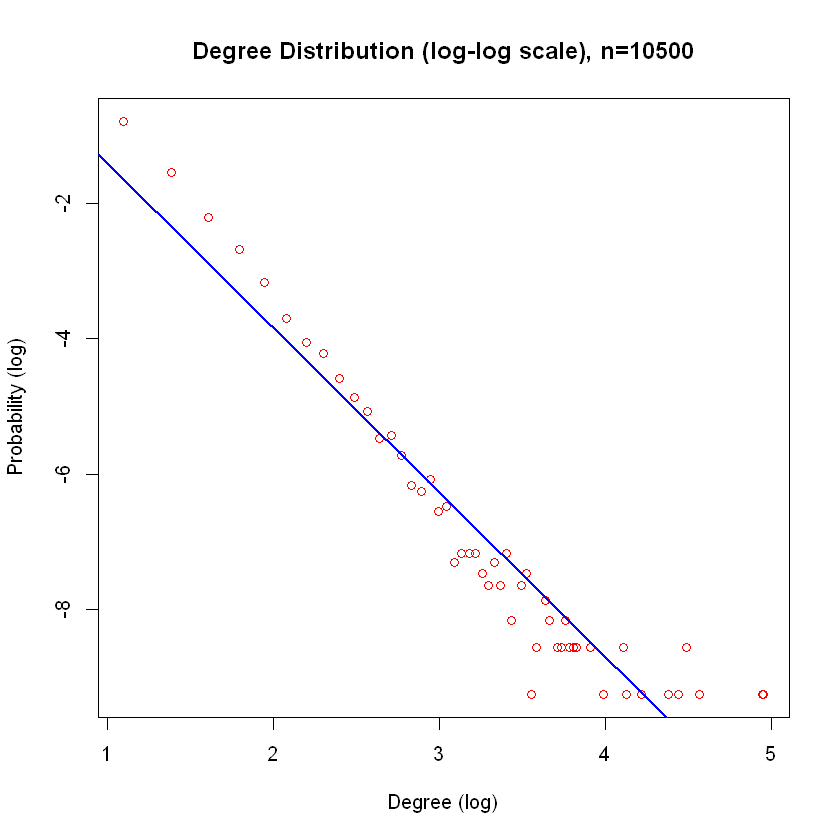

In [18]:
degree_dist_2 = degree.distribution(pa_part_f_2)
log_deg_2 <- log(which(degree_dist_2 !=0))
log_dist_2 <- log(degree_dist_2[which(degree_dist_2 !=0)])
plot(log_deg_2,log_dist_2,main="Degree Distribution (log-log scale), n=10500", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_2 = lm(log_dist_2 ~ log_deg_2)
abline(fit_2,col="blue",lwd=2)
print("Fitting data for n = 10500:")
print(fit_2)

In [19]:
degree_neighbors_a = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_f_1), 1) 
    neighbors_i = neighbors(pa_part_f_1, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_a = c(degree_neighbors_a, degree(pa_part_f_1, node_j))
}

In [20]:
degree_neighbors_c = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_f_2), 1) 
    neighbors_i = neighbors(pa_part_f_2, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_c = c(degree_neighbors_c, degree(pa_part_f_2, node_j))
}

[1] "Fitting data for n = 1050:"

Call:
lm(formula = log_dist_neighbors_a ~ log_degree_neighbors_a)

Coefficients:
           (Intercept)  log_degree_neighbors_a  
                -1.321                  -0.978  



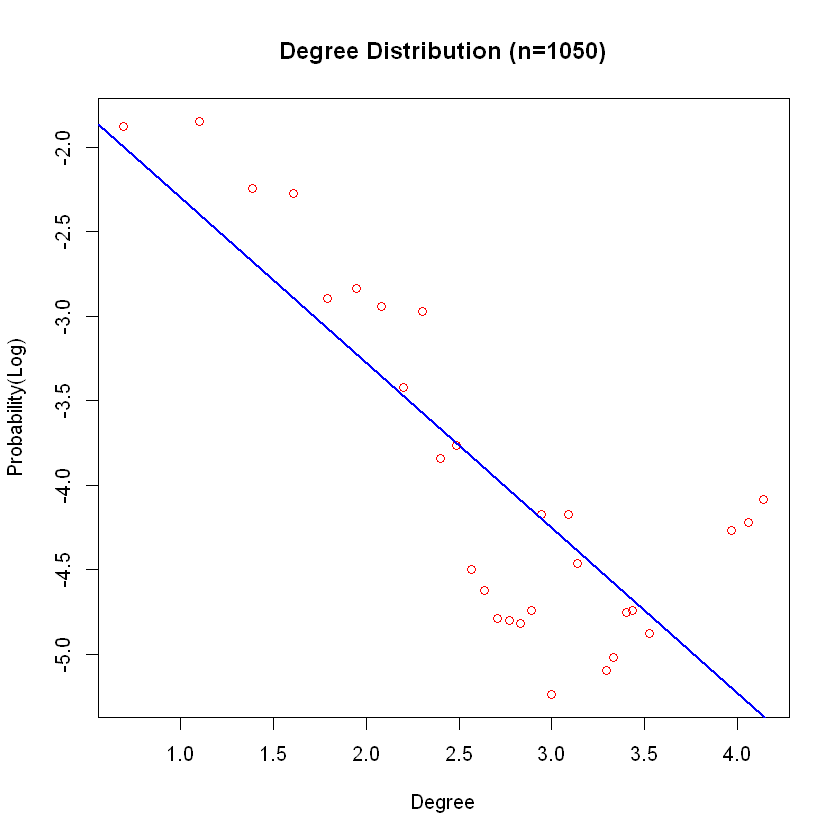

In [21]:
data_degree_neighbors_a = as.data.frame(table(degree_neighbors_a))
degrees = as.numeric(as.character(data_degree_neighbors_a$degree_neighbors_a))
log_degree_neighbors_a = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_a$Freq/sum(data_degree_neighbors_a$Freq)
log_dist_neighbors_a = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_a,log_dist_neighbors_a,main="Degree Distribution (n=1050)", xlab= "Degree",ylab= "Probability(Log)",col="red")
fit_3 = lm(log_dist_neighbors_a ~ log_degree_neighbors_a)
abline(fit_3,col="blue",lwd=2)
print("Fitting data for n = 1050:")
print(fit_3)

[1] "Fitting data for n = 10500:"

Call:
lm(formula = log_dist_neighbors_c ~ log_degree_neighbors_c)

Coefficients:
           (Intercept)  log_degree_neighbors_c  
               -0.9953                 -1.2566  



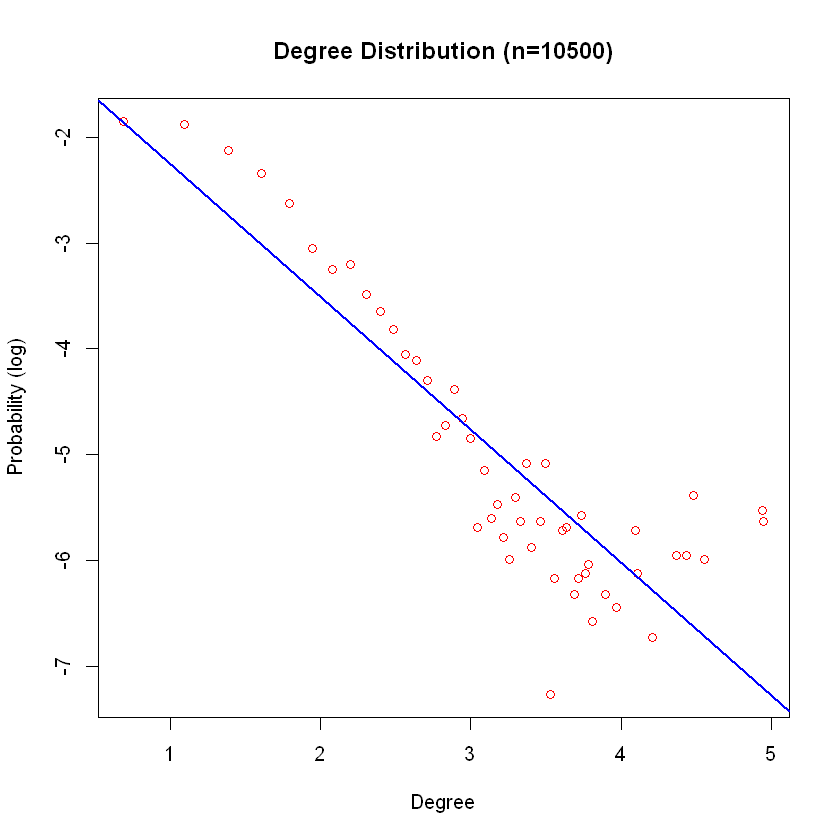

In [22]:
data_degree_neighbors_c = as.data.frame(table(degree_neighbors_c))
degrees = as.numeric(as.character(data_degree_neighbors_c$degree_neighbors_c))
log_degree_neighbors_c = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_c$Freq/sum(data_degree_neighbors_c$Freq)
log_dist_neighbors_c = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_c,log_dist_neighbors_c,main="Degree Distribution (n=10500)", xlab="Degree",ylab="Probability (log)",col="red")
fit_4 = lm(log_dist_neighbors_c ~ log_degree_neighbors_c)
abline(fit_4,col="blue",lwd=2)
print("Fitting data for n = 10500:")
print(fit_4)

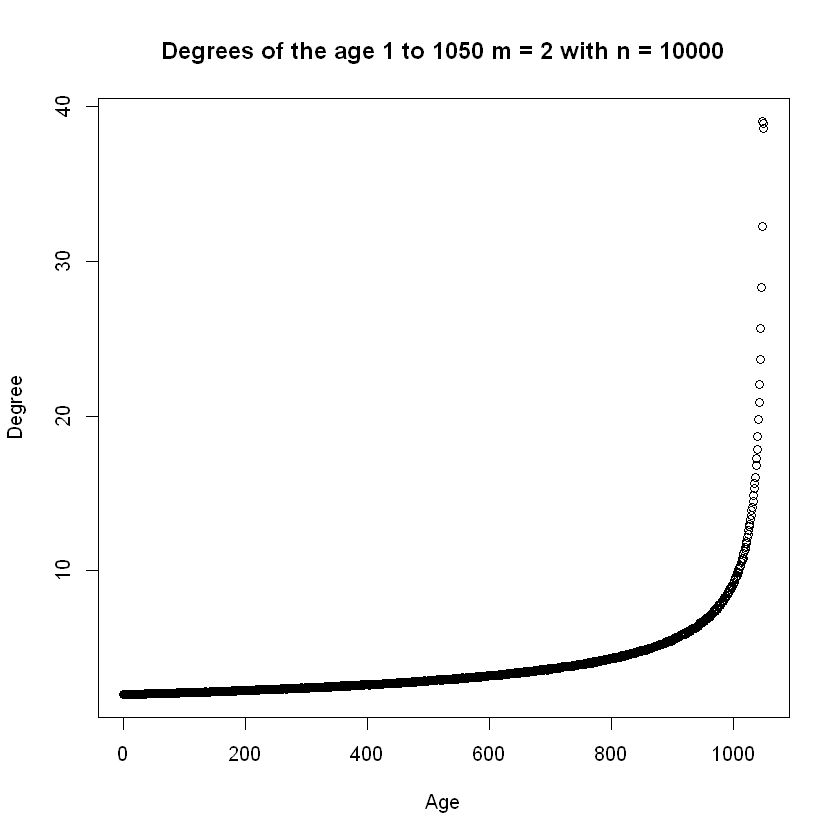

In [23]:
degree_age = rep(0,1050)
n_samples = 10000
for (i in seq(1:n_samples)) 
{
    graph_age = sample_pa(1050, m = 2, directed=FALSE)
    degree_age = degree_age + as.vector(degree(graph_age))
}

degree_age = degree_age / n_samples
plot(seq(1050,1,-1), degree_age, main="Degrees of the age 1 to 1050 m = 2 with n = 10000",xlab="Age",ylab="Degree")
     


## part f part 2


[1] "Partial Attachment Model produced a connected graph"


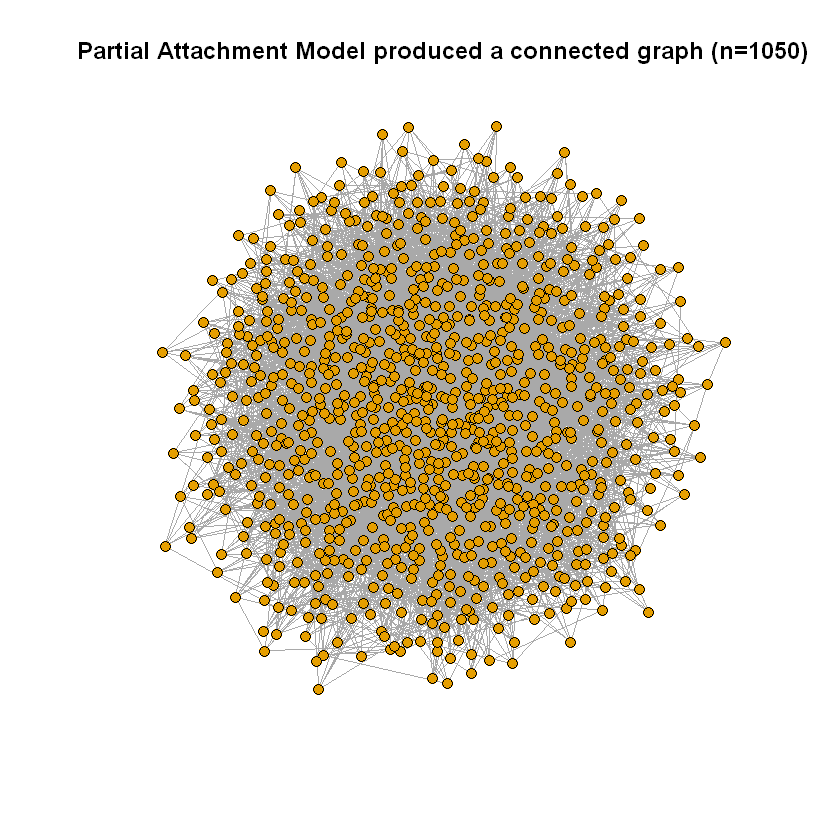

[1] "Modularity of PA graph:  0.253818301555063"
[1] "Assortativity:  -0.0353691813791241"


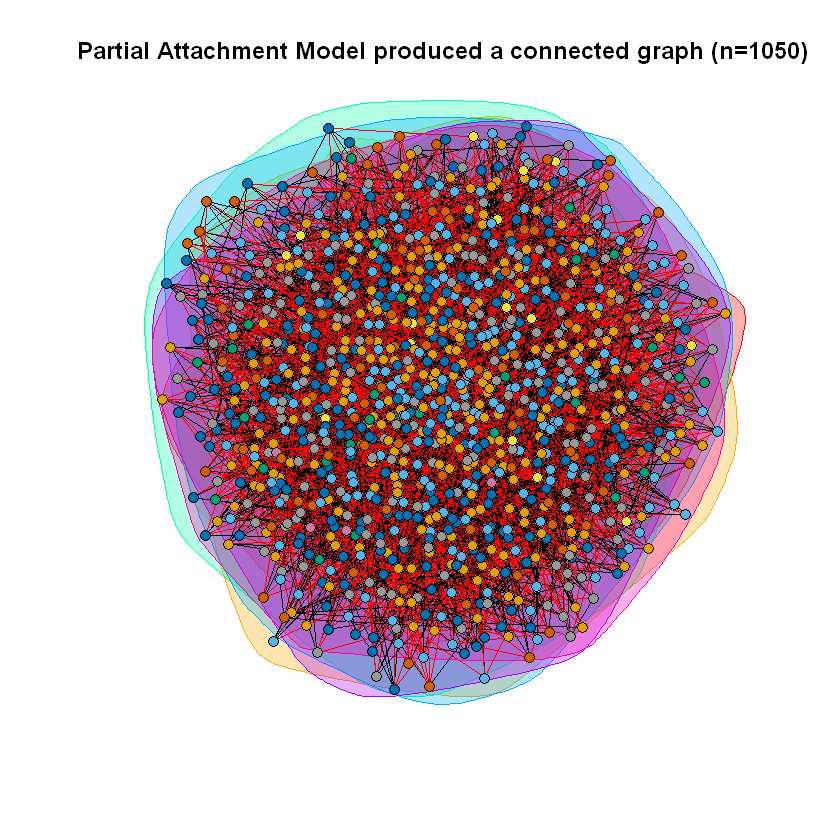

In [24]:
pa_part_f_3 = sample_pa(n=1050,m=6,directed = FALSE)
if(is_connected(pa_part_f_3)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_f_3,vertex.size=4, vertex.label=NA,  main="Partial Attachment Model produced a connected graph (n=1050)")
pa_community_3 = cluster_fast_greedy(pa_part_f_3)
pa_modularity_3 = modularity(pa_community_3)
pa_assortativity_3 = assortativity_degree(pa_part_f_3)
plot(pa_community_3,pa_part_f_3, vertex.size = 4,vertex.label = NA, main="Partial Attachment Model produced a connected graph (n=1050)")
print(paste("Modularity of PA graph: ", pa_modularity_3))
print(paste("Assortativity: ", pa_assortativity_3))


[1] "Partial Attachment Model produced a connected graph"


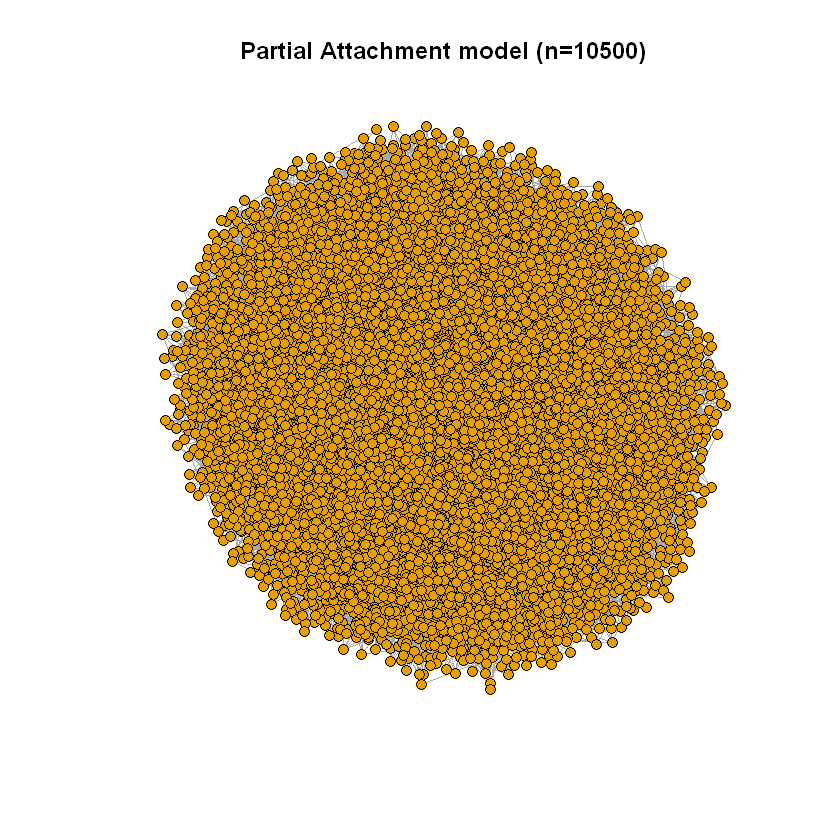

[1] "Modularity of PA graph:  0.250770409527297"
[1] "Assortativity:  -0.00316881510499847"


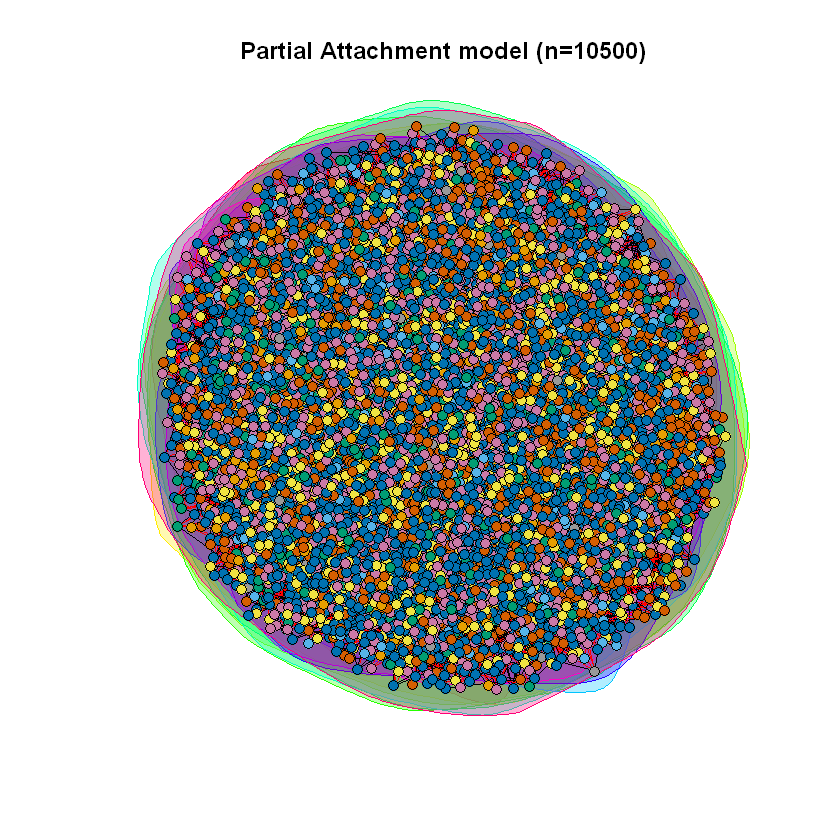

In [25]:
pa_part_f_4 = sample_pa(n=10500,m= 6,directed = FALSE)
if(is_connected(pa_part_f_4)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")
    
}
plot(pa_part_f_4,vertex.size=4, vertex.label=NA, main="Partial Attachment model (n=10500)")
pa_community_4 = cluster_fast_greedy(pa_part_f_4)
pa_modularity_4 = modularity(pa_community_4)
pa_assortativity_4=assortativity_degree(pa_part_f_4)
plot(pa_community_4,pa_part_f_4, vertex.size = 4,vertex.label = NA, main="Partial Attachment model (n=10500)")
print(paste("Modularity of PA graph: ", pa_modularity_4))
print(paste("Assortativity: ", pa_assortativity_4))

[1] "Slope and intercept for n = 1050:"

Call:
lm(formula = log_dist_1 ~ log_deg_1)

Coefficients:
(Intercept)    log_deg_1  
      1.264       -1.937  



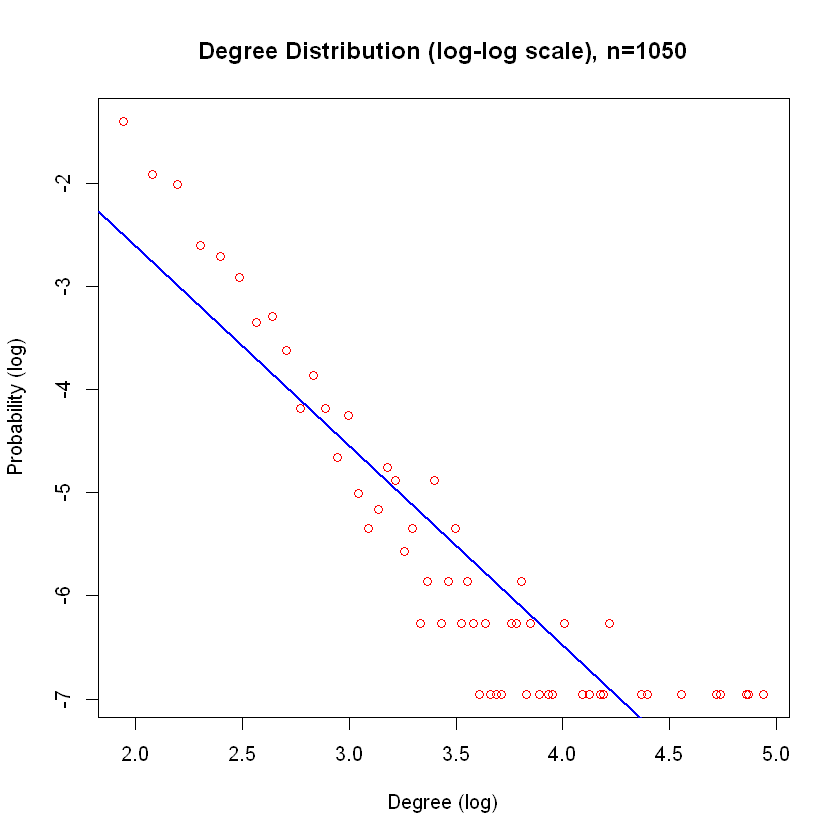

In [26]:
degree_dist_1 = degree.distribution(pa_part_f_3)
log_deg_1 <- log(which(degree_dist_1 !=0, arr.ind = TRUE))
log_dist_1 <- log(degree_dist_1[which(degree_dist_1 !=0)])
plot(log_deg_1,log_dist_1,main="Degree Distribution (log-log scale), n=1050", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_1 = lm(log_dist_1 ~ log_deg_1)
abline(fit_1,col="blue",lwd=2)  
print("Slope and intercept for n = 1050:")
print(fit_1)

[1] "Fitting data for n = 10500:"

Call:
lm(formula = log_dist_2 ~ log_deg_2)

Coefficients:
(Intercept)    log_deg_2  
      1.557       -2.175  



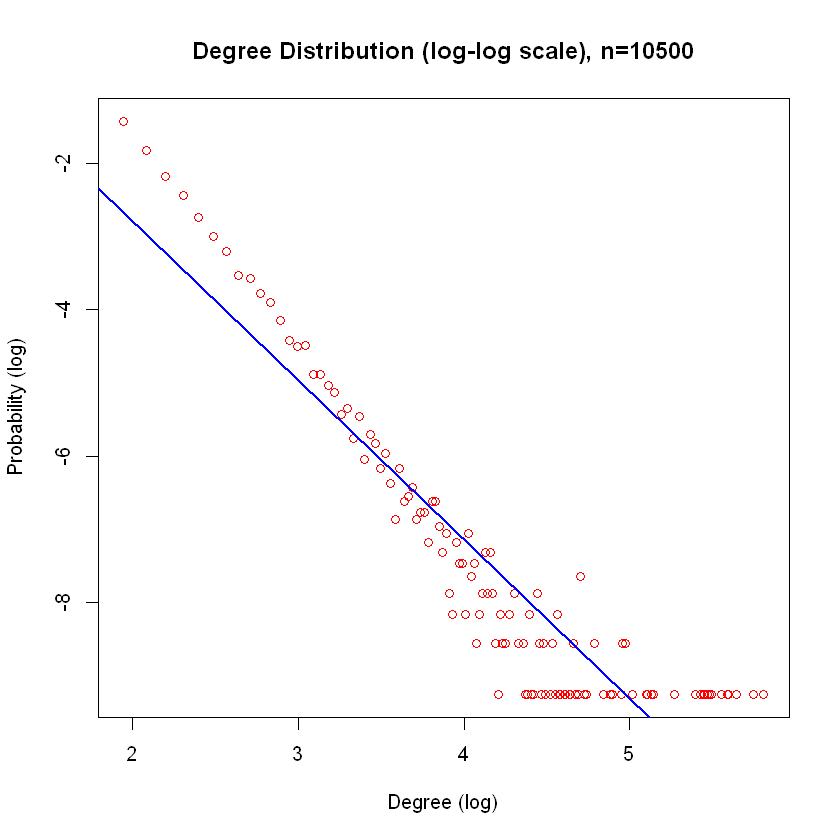

In [27]:
degree_dist_2 = degree.distribution(pa_part_f_4)
log_deg_2 <- log(which(degree_dist_2 !=0))
log_dist_2 <- log(degree_dist_2[which(degree_dist_2 !=0)])
plot(log_deg_2,log_dist_2,main="Degree Distribution (log-log scale), n=10500", xlab="Degree (log)",ylab="Probability (log)",col="red")
fit_2 = lm(log_dist_2 ~ log_deg_2)
abline(fit_2,col="blue",lwd=2)
print("Fitting data for n = 10500:")
print(fit_2)

In [28]:
degree_neighbors_a = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_f_3), 1) 
    neighbors_i = neighbors(pa_part_f_3, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_a = c(degree_neighbors_a, degree(pa_part_f_3, node_j))
}

In [29]:
degree_neighbors_c = c()
n_samples = 10000
for (i in 1:n_samples) 
{
    node_i = sample(vcount(pa_part_f_4), 1) 
    neighbors_i = neighbors(pa_part_f_4, node_i)
    node_j = sample(neighbors_i, 1)   
    degree_neighbors_c = c(degree_neighbors_c, degree(pa_part_f_4, node_j))
}

[1] "Fitting data for n = 1050:"

Call:
lm(formula = log_dist_neighbors_a ~ log_degree_neighbors_a)

Coefficients:
           (Intercept)  log_degree_neighbors_a  
               -1.5552                 -0.8536  



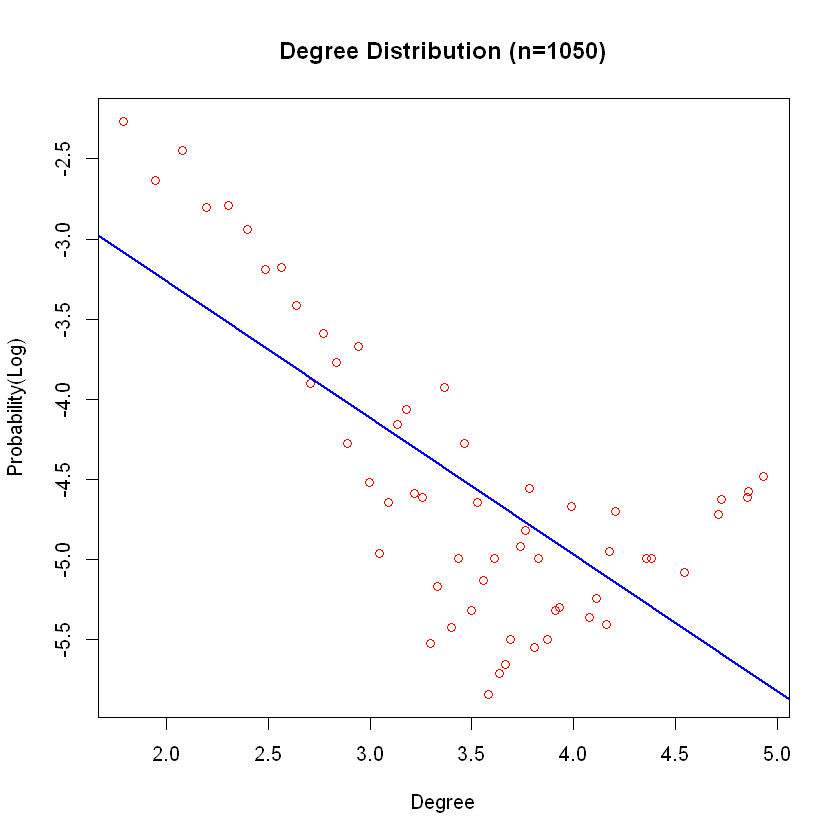

In [30]:
data_degree_neighbors_a = as.data.frame(table(degree_neighbors_a))
degrees = as.numeric(as.character(data_degree_neighbors_a$degree_neighbors_a))
log_degree_neighbors_a = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_a$Freq/sum(data_degree_neighbors_a$Freq)
log_dist_neighbors_a = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_a,log_dist_neighbors_a,main="Degree Distribution (n=1050)", xlab= "Degree",ylab= "Probability(Log)",col="red")
fit_3 = lm(log_dist_neighbors_a ~ log_degree_neighbors_a)
abline(fit_3,col="blue",lwd=2)
print("Fitting data for n = 1050:")
print(fit_3)

[1] "Fitting data for n = 10050:"

Call:
lm(formula = log_dist_neighbors_c ~ log_degree_neighbors_c)

Coefficients:
           (Intercept)  log_degree_neighbors_c  
               -0.9427                 -1.1921  



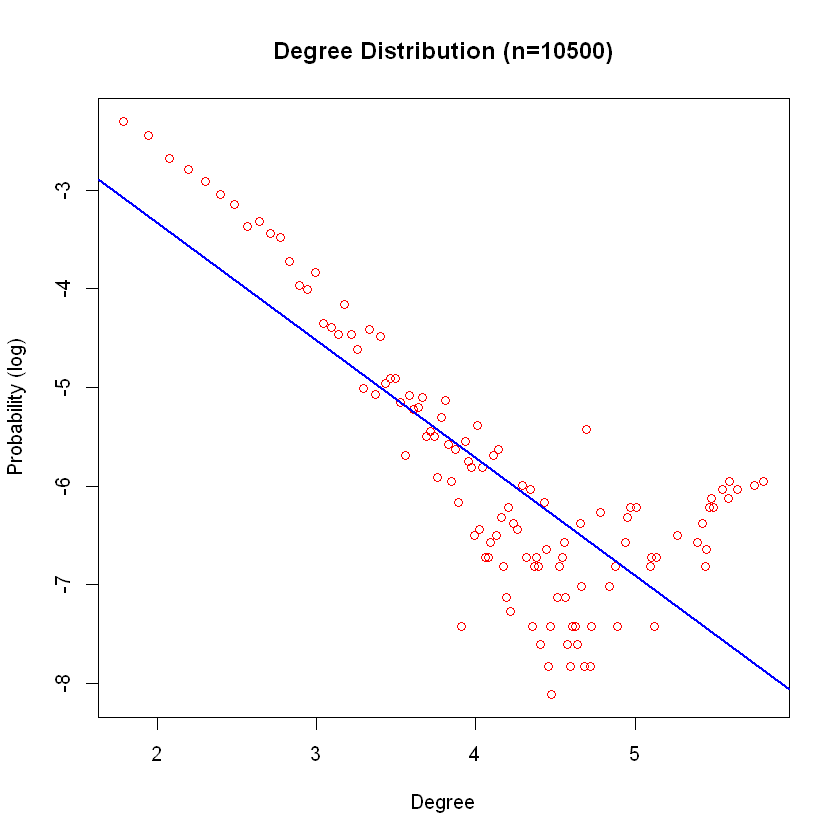

In [31]:
data_degree_neighbors_c = as.data.frame(table(degree_neighbors_c))
degrees = as.numeric(as.character(data_degree_neighbors_c$degree_neighbors_c))
log_degree_neighbors_c = log(degrees[which(degrees !=0)])
dist_degrees = data_degree_neighbors_c$Freq/sum(data_degree_neighbors_c$Freq)
log_dist_neighbors_c = log(dist_degrees[which(degrees !=0)])
plot(log_degree_neighbors_c,log_dist_neighbors_c,main="Degree Distribution (n=10500)", xlab="Degree",ylab="Probability (log)",col="red")
fit_4 = lm(log_dist_neighbors_c ~ log_degree_neighbors_c)
abline(fit_4,col="blue",lwd=2)
print("Fitting data for n = 10050:")
print(fit_4)

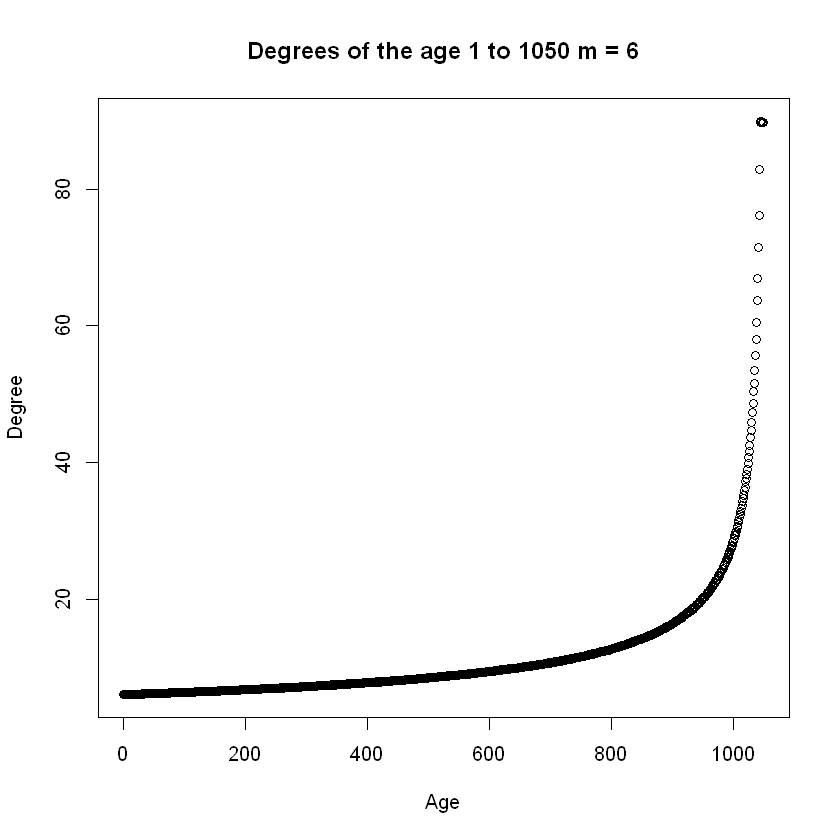

In [32]:
degree_age = rep(0,1050)
n_samples = 10500
for (i in seq(1:n_samples)) 
{
    graph_age = sample_pa(1050, m =6, directed=FALSE)
    degree_age = degree_age + as.vector(degree(graph_age))
}

degree_age = degree_age / n_samples
plot(seq(1050,1,-1), degree_age, main="Degrees of the age 1 to 1050 m = 6",xlab="Age",ylab="Degree")

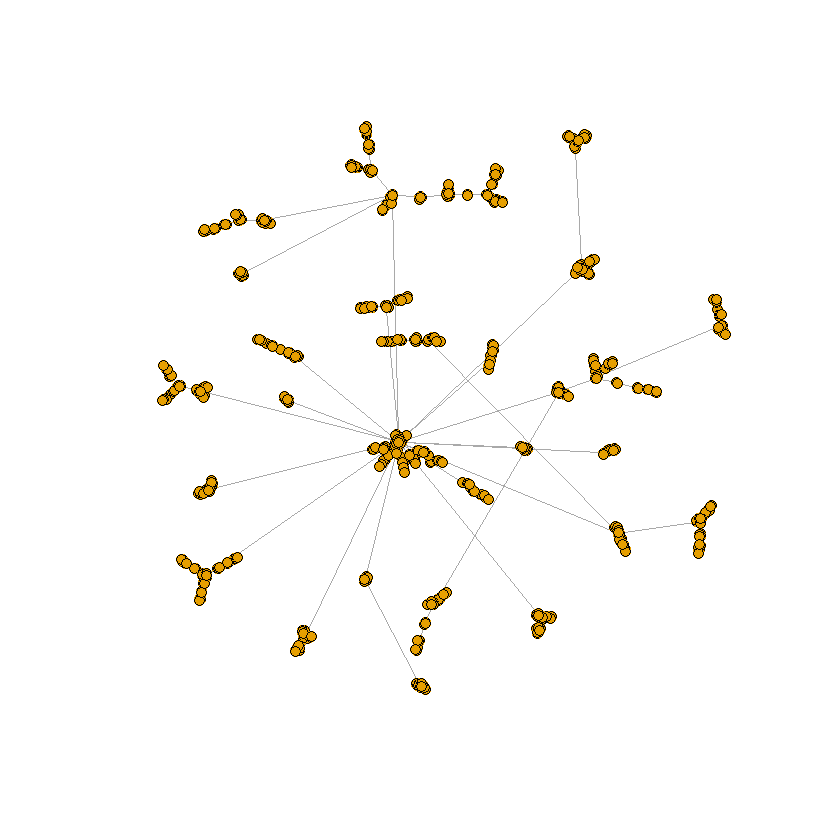

[1] "Partial Attachment Model produced a connected graph"
[1] "Modularity of PA graph:  0.93235102476279"
[1] "Assortativity:  -0.0270509770324929"


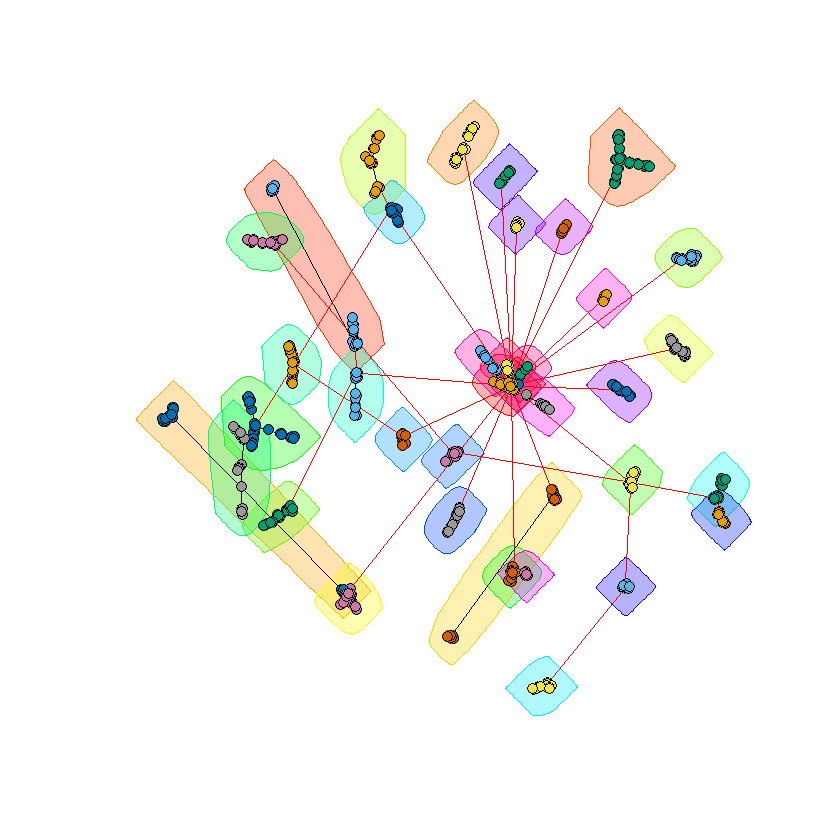

In [33]:
#part h
graph_h = sample_pa(1050, m = 1 , directed=FALSE)
community_h = fastgreedy.community(graph_h)
modularity_h = modularity(community_h)
plot(graph_h,vertex.size=4, vertex.label=NA)
plot(community_h,graph_h,vertex.size=4, vertex.label=NA)
pa_assortativity_h=assortativity_degree(graph_h)
if(is_connected(graph_h)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")  
}
print(paste("Modularity of PA graph: ", modularity_h))
print(paste("Assortativity: ", pa_assortativity_h))


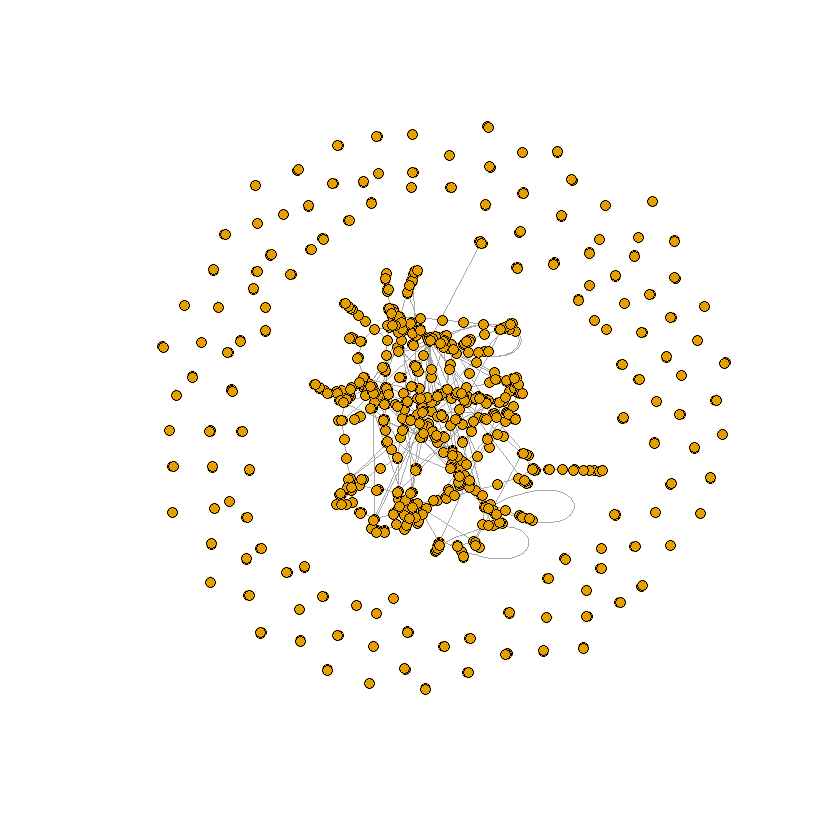

[1] "Partial Attachment Model did not produce a connected graph"
[1] "Modularity of PA graph:  0.736390829086304"
[1] "Assortativity:  0.0382226460231049"


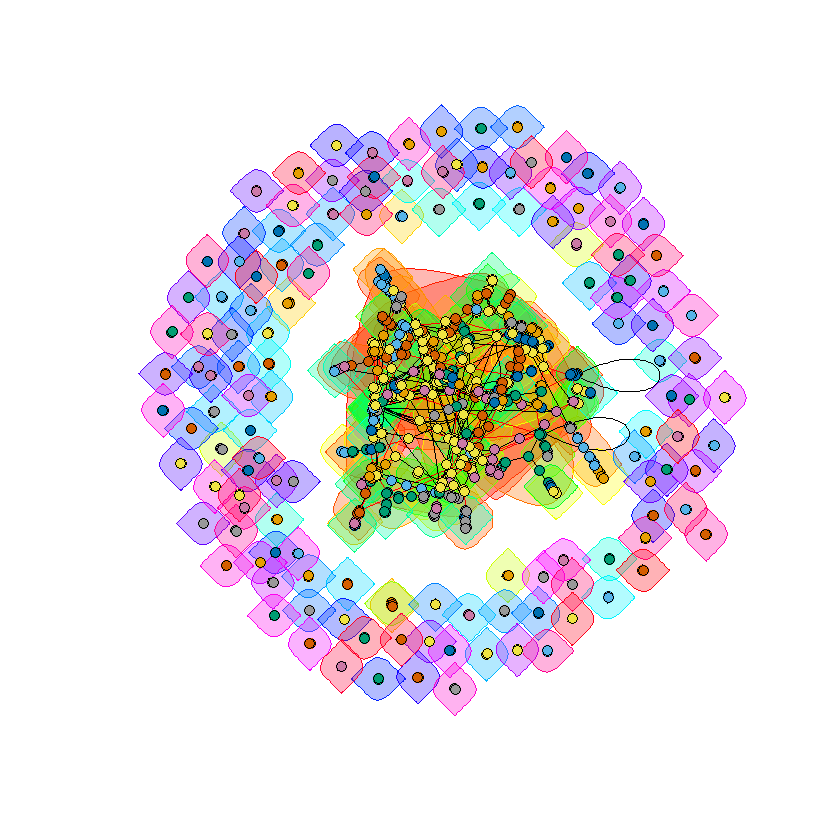

In [34]:
degrees_h = degree(graph_h) 
graph_h_2 = sample_degseq(degrees_h, method="simple")
community_h_2 = walktrap.community(graph_h_2)
modularity_h_2 = modularity(community_h_2)
plot(graph_h_2,vertex.size=4, vertex.label=NA)
plot(community_h_2,graph_h_2,vertex.size=4, vertex.label=NA)
pa_assortativity_h_2=assortativity_degree(graph_h_2)
if(is_connected(graph_h_2)){
    print("Partial Attachment Model produced a connected graph")
} else{
    print("Partial Attachment Model did not produce a connected graph")  
}
print(paste("Modularity of PA graph: ", modularity_h_2))
print(paste("Assortativity: ", pa_assortativity_h_2))